In [1]:
import numpy as np
import astropy.constants as c
import math
from statistics import stdev
import scipy
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='serif')

'''finding the correct files'''
#folderpath = "/home/luke740/Documents/Y3 (S2) Asteroseismology Group Studies/Code Scripts/Data/"
#filename = "ypoints(27-02).txt"
#filepath = str(folderpath) + str(filename)
#catalogue = np.genfromtxt(filepath, dtype=None)
#np.save("y1", catalogue)

#
#K_dwarves_plat_1_order.npy
#V_max.txt

#catalogue = np.load("Y1_(25-02-20).npy")

#ypoints(27-02).txt
#otherstuff(27-02).txt

catalogue = np.genfromtxt('Kypoints.txt', delimiter=' ')  
#print(len(catalogue))
frequency = catalogue[0]
print(frequency)
other = np.genfromtxt('Kotherstuff.txt', delimiter=' ')  
star_no = other[:,0]
vmaxs = other[:,1]
vmags = other[:,2]
print(star_no)
print(vmags)

[1.00000000e+00 1.02642311e+00 1.05284622e+00 ... 1.49999472e+04
 1.49999736e+04 1.50000000e+04]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[7.319 7.999 8.495 8.5   8.587 8.634 8.821 8.859 8.963 9.042]


In [2]:
'''adds noise'''
def addnoise(pure):
    vary = np.random.uniform(0,1,pure.shape)
    signal=-(pure*np.log(vary))
    return signal

def bin_it(yvalues,xvalues,binsize):
    '''puts an array into averaged bins of a given size'''
    N=int(math.ceil(len(yvalues)/binsize))
    C=0
    newy=[]
    while C<N:
        if (C+1)*binsize<len(yvalues):
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
        newy.append(Q)
        C+=1
    y=np.array(newy)
    x=xvalues[0::binsize]
    return y[0:len(y)-1],x[0:len(y)-1]

In [3]:
def graneq(x, A, tau):
    '''equation to describe the background'''
    return A/(1+(2*np.pi*x*tau)**2) + SN

def findgran(x,y):
    #guess_vals=[np.max(y),y[round(len(y)/4)]]
    guess_vals=[0, 0]
    best_vals, covar = curve_fit(graneq, x, y,p0=guess_vals)
    return best_vals

def gausgran(x,height,centre,width):
    '''plots a gaussian acounting for granulation'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))+fittedgran

def gausgran1(x,height,centre,width):
    '''plots a gaussian acounting for granulation'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))-fittedgran

In [4]:
def find_vmax(Fulldata, frequency, N, binsize, truevmax):
    x = np.array(frequency)
    C=0
    fails=0
    centres=[]
    widths=[]
    amps=[]
    while C<N:
        if C % (25*(N/100)) == 0:
            print(f'Code is {C/(N/100)}% complete') #if statment that allows tracking of code completion while it is running
        y = addnoise(Fulldata) #adds noise to y values, inside loop so each curve fit will be different due to the random noise
        yb, xb = bin_it(y,x,binsize) #yb and xb as in xbinned and ybinned bins data with a binsize of 50
        best_vals = findgran(xb, yb)
        fittedgran = graneq(xb, best_vals[0], best_vals[1])
        #guess_vals=[np.max(yb),xb[0]+(xb[-1]-xb[0])/2,(xb[-1]-xb[0])/4] #rough guesses which will change with each plot
        guess_vals=[3,5000,300] #height, centre, width
        #try and except are used in case a gaussian cant be fitted to the data, allowing the code to continue 
        #even if a fit can not be found. If a fit can be found the v_max is recorded and added to an array of v_max values. If a fit can not
        #be found the failure is recored and the code continues with the next trial
        try: 
            best_vals2, covar = curve_fit(gausgran, xb, yb, p0=guess_vals)
            #attempts to fit a gaussian to the data taking acount of the granulation
            amps.append(best_vals2[0])
            centres.append(best_vals2[1])
            widths.append(best_vals2[2])
        except:
            fails+=1 #records failure
            C+=1
            continue
        C+=1
    percentage=fails*100/N
    print(f'Number of trials {N}, binsize: {binsize}')
    print(f'{percentage}% trails failed to fit a gaussian') 
    if len(centres)<1: #prevents error in code
        print('Code failed to fit any gaussians')
        return best_vals
    else:   
        average_centres=np.mean(centres)
        difference=np.abs(average_centres-truevmax)
        print(f'average v_max {average_centres} which is {difference} away from the true value of truevmax ')
        print('')
        return best_vals, best_vals2

No handles with labels found to put in legend.


7.319
A is 2.596081710474146 and tau is 0.00012977035209606427
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10046.928510107069 which is 5203.39493281446 away from the true value of truevmax 

[2.54159446e+00 1.27548542e-04]
[-2.73847479e+00  1.00325392e+04 -7.84661308e+03]


/home/luke740/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


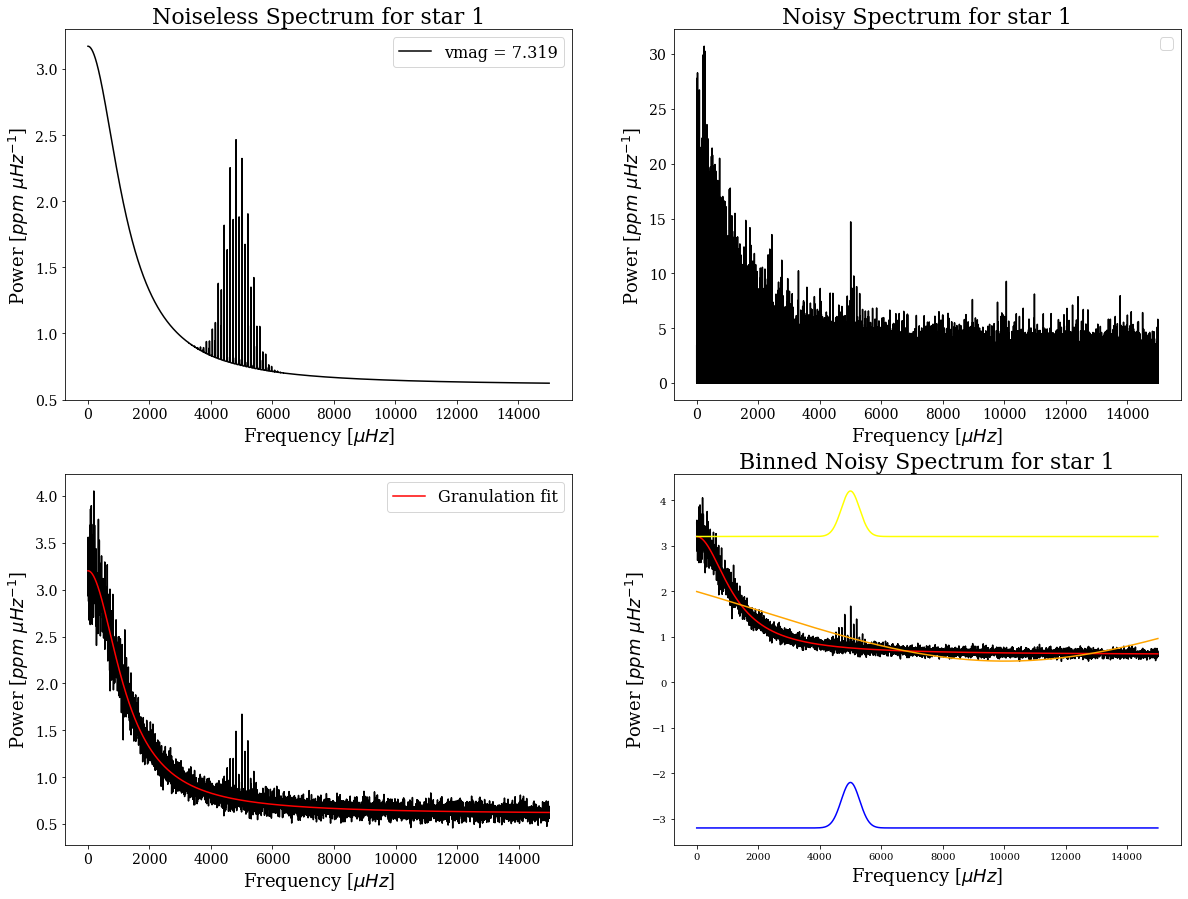

No handles with labels found to put in legend.


7.999
A is 1.3863871302559825 and tau is 0.00010062578734486863
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10244.726105990907 which is 4265.949661644782 away from the true value of truevmax 

[1.44376123e+00 1.07180969e-04]
[-1.46359883e+00  1.02335626e+04  7.23700677e+03]


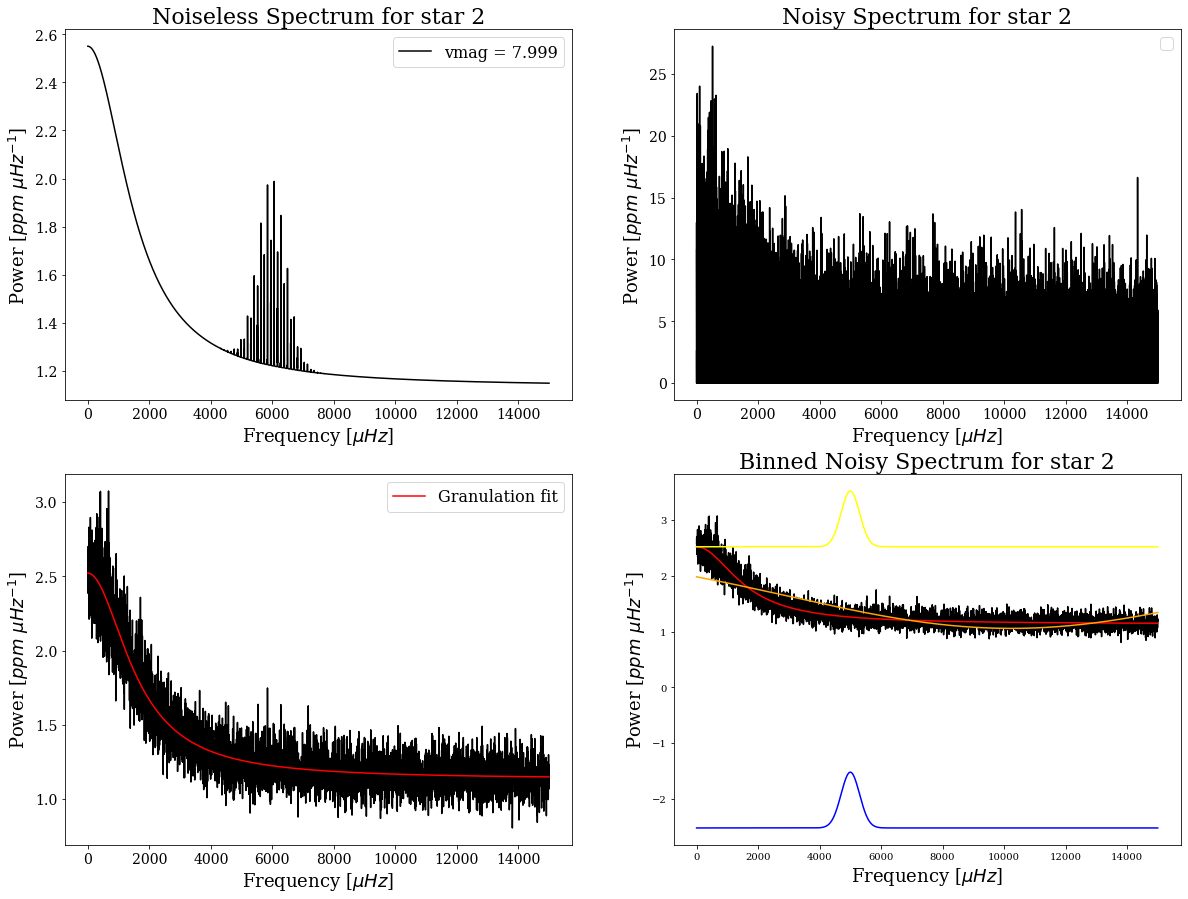

No handles with labels found to put in legend.


8.495
A is 1.4997362609221938 and tau is 0.00010181658176223767
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10213.287068966683 which is 4117.043439225932 away from the true value of truevmax 

[1.44480362e+00 9.97482061e-05]
[-1.58436283e+00  1.01439751e+04  7.26597759e+03]


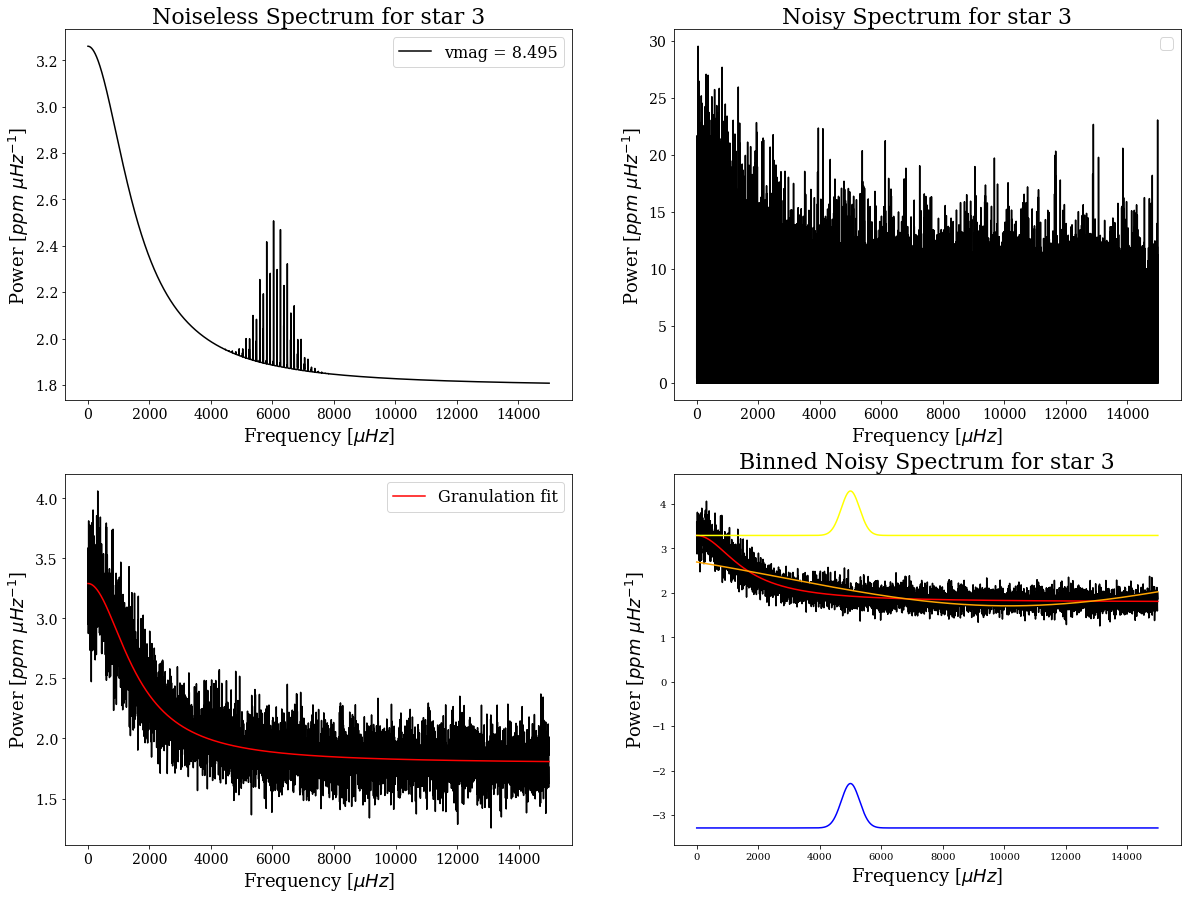

No handles with labels found to put in legend.


8.5
A is 2.455518941756672 and tau is 0.0001269415481774382
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10055.48638843626 which is 5195.754445148642 away from the true value of truevmax 

[2.44135892e+00 1.22814378e-04]
[-2.59490830e+00  9.97549941e+03 -7.60518503e+03]


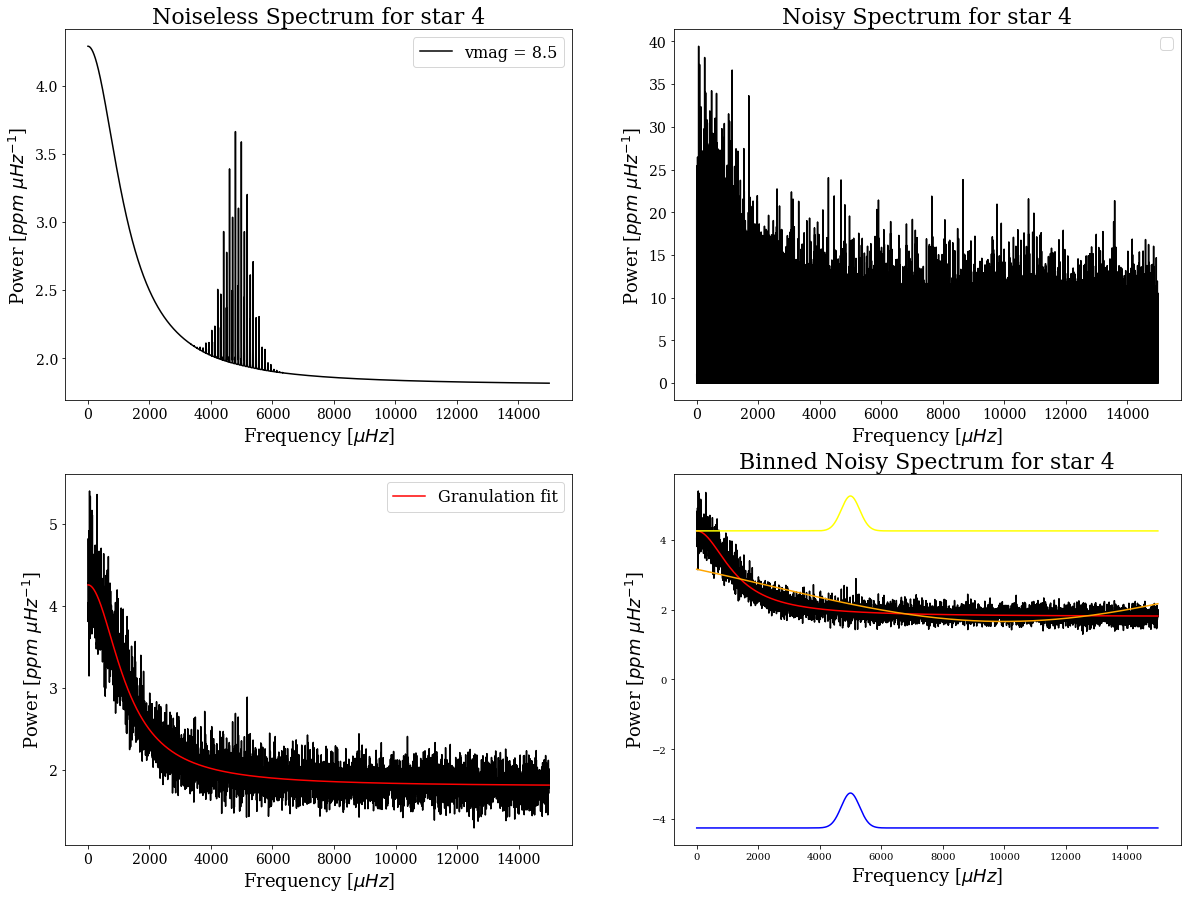

No handles with labels found to put in legend.


8.587
A is 1.6937985410160599 and tau is 0.00010918758773029652
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10205.942090066783 which is 4584.311357116311 away from the true value of truevmax 

[1.74572609e+00 1.12849251e-04]
[-1.79693477e+00  1.02615343e+04  7.44782948e+03]


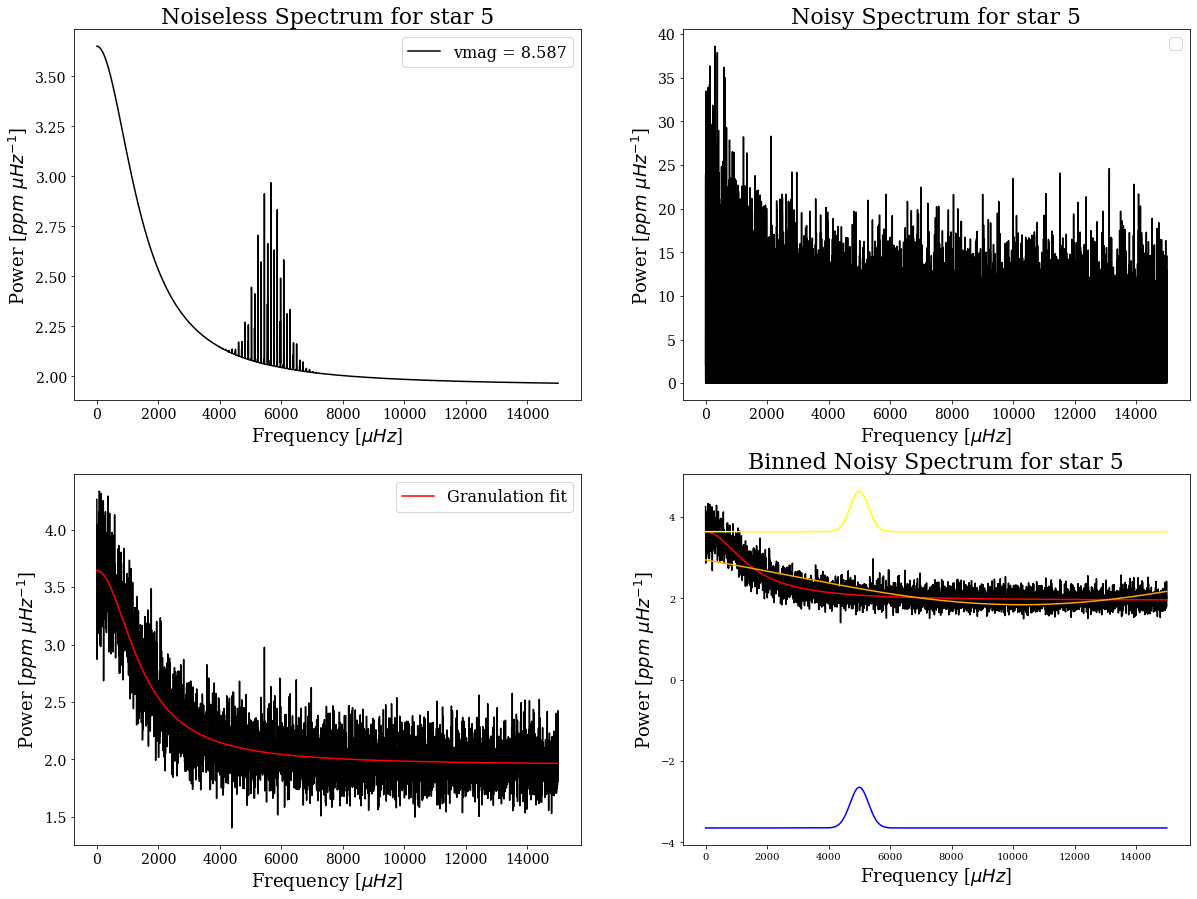

No handles with labels found to put in legend.


8.634
A is 1.6054200679056387 and tau is 0.00010872887999004991
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10150.608269614502 which is 4474.347815192302 away from the true value of truevmax 

[1.63248011e+00 1.09589033e-04]
[-1.70393441e+00  1.00116800e+04  7.18228390e+03]


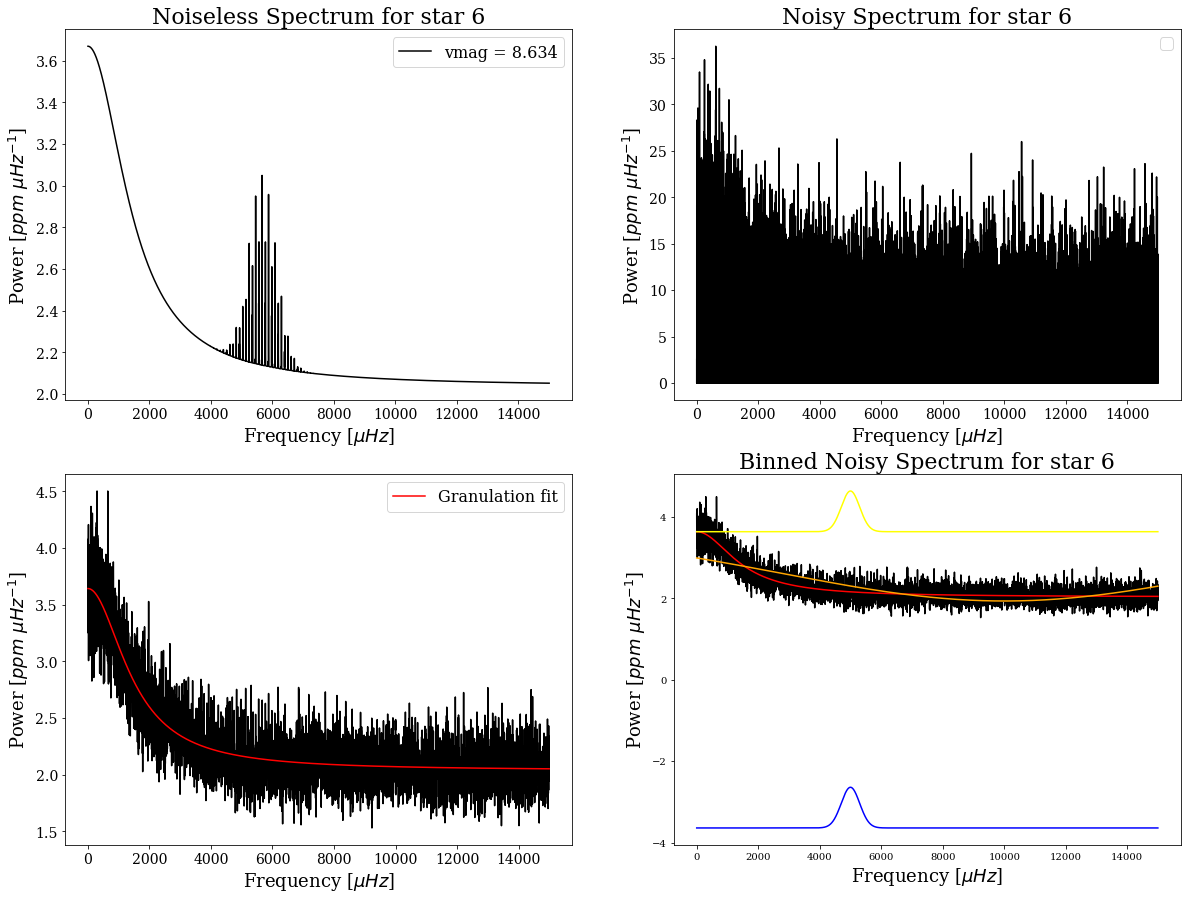

No handles with labels found to put in legend.


8.821
A is 1.808888153254353 and tau is 0.00011296091943482843
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10190.676853272136 which is 4692.580901720642 away from the true value of truevmax 

[1.83136344e+00 1.10582431e-04]
[-1.90575209e+00  1.02763150e+04  7.51124195e+03]


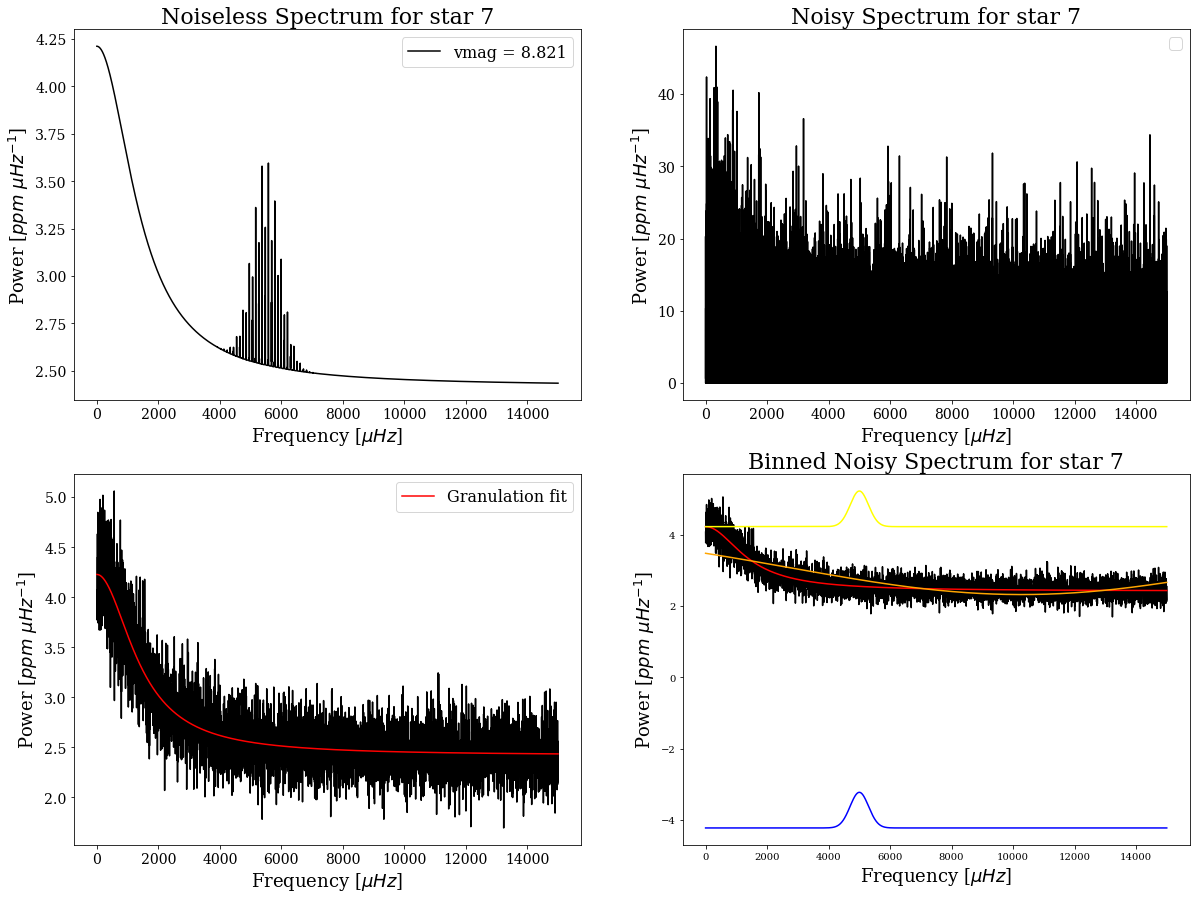

No handles with labels found to put in legend.


8.859
A is 2.723967318008354 and tau is 0.00013297768933044353
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10005.801419206535 which is 5239.710588023652 away from the true value of truevmax 

[2.63136562e+00 1.26471905e-04]
[-2.89185189e+00  9.97273143e+03 -7.76074939e+03]


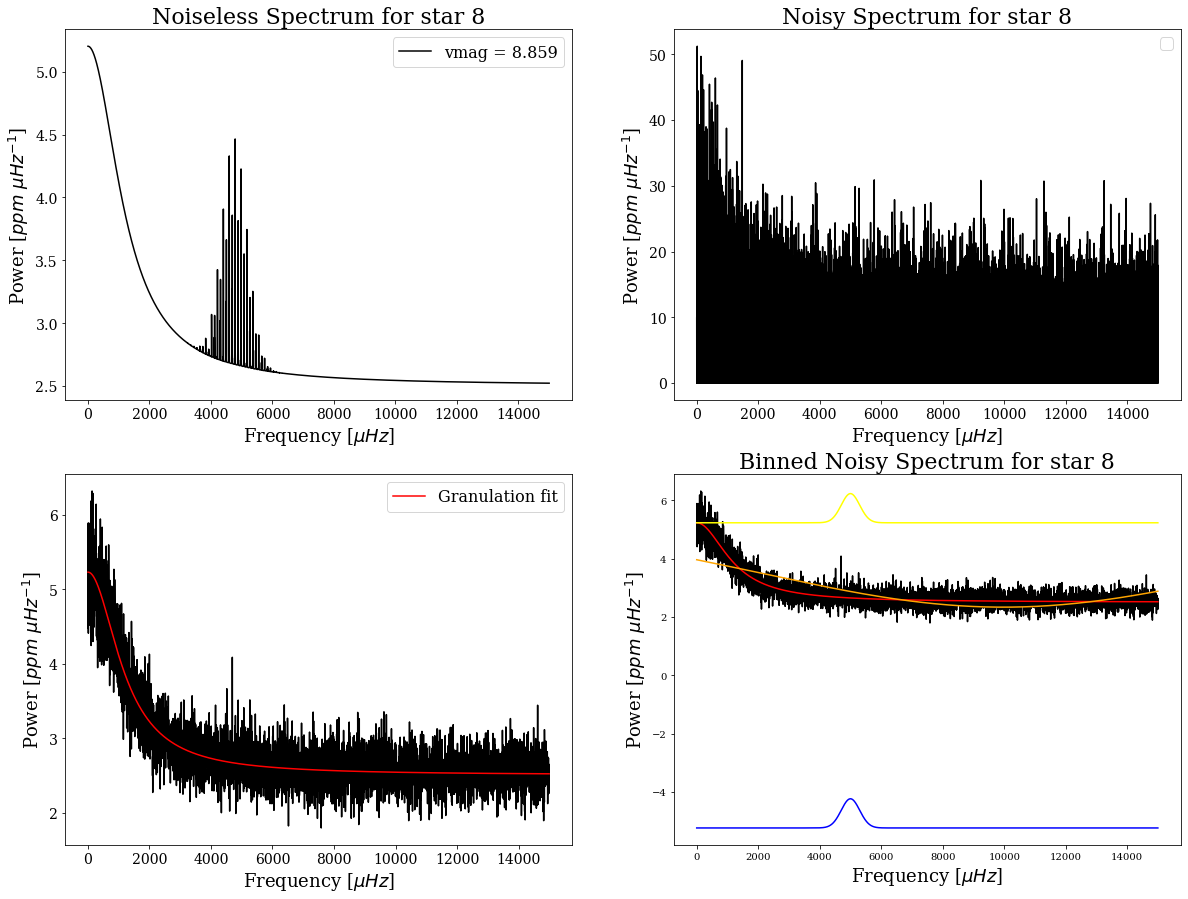

No handles with labels found to put in legend.


8.963
A is 1.632150813625675 and tau is 0.0001038583769301021
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10218.090547597632 which is 4344.383059251826 away from the true value of truevmax 

[1.60531785e+00 1.06124102e-04]
[-1.71200092e+00  1.01691136e+04  7.41303212e+03]


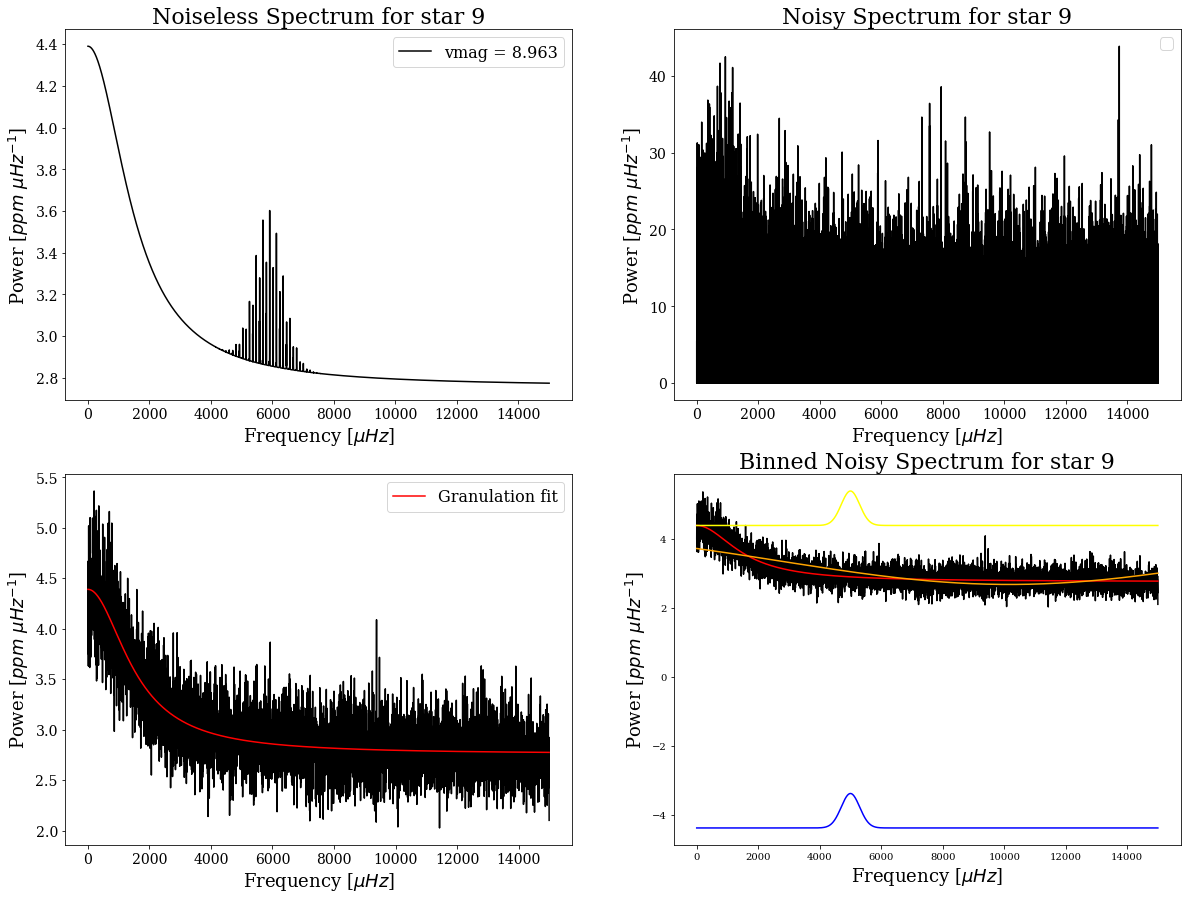

No handles with labels found to put in legend.


9.042
A is 1.3864739880618082 and tau is 9.877601768150844e-05
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10237.783501770438 which is 4272.757861665535 away from the true value of truevmax 

[1.38133779e+00 9.56472488e-05]
[-1.44674820e+00  1.02919712e+04  7.24771918e+03]


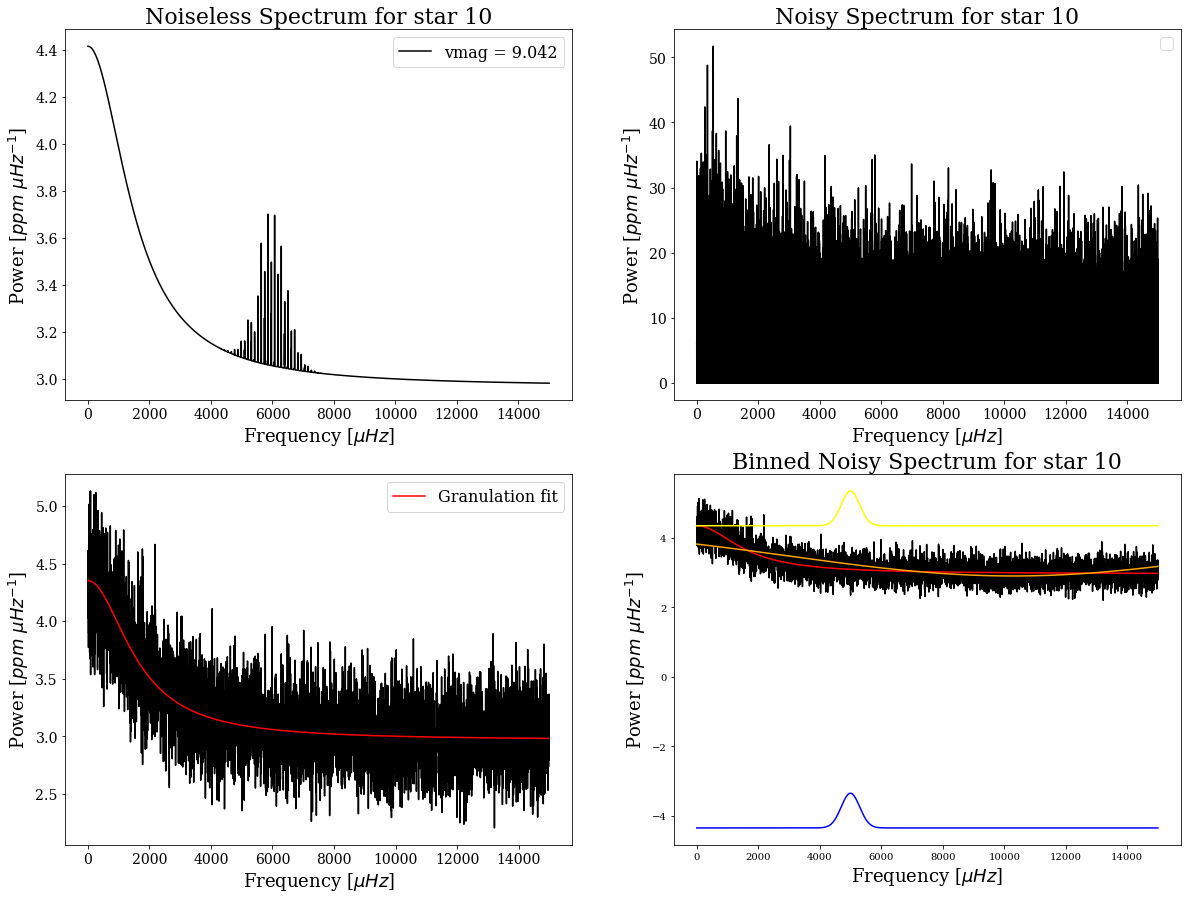

In [5]:
for i in range(1, len(catalogue)):
    binsize=120
    N = 40
    vmag = vmags[i-1]
    truevmax = vmaxs[i-1]
    print(vmag)
    SN = 18.0*10**(-0.4*(11-vmag))
    x = []
    y = []
    x.append(catalogue[0])
    y.append(catalogue[i]) # change index to pick star in data set
    
    fig = plt.subplots(figsize=(20,15))
    plt.subplot(2, 2, 1)
    plt.plot(x[0], y[0], color='k', label = f'vmag = {vmag}') #leave these indicies
    plt.title(f'Noiseless Spectrum for star {i}', fontsize = 22)
    plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
    plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize = 16)
    
    y_n = addnoise(y[0])
    plt.subplot(2, 2, 2)
    plt.plot(x[0], y_n, color='k') #label = ‘label’) #leave these indicies
    plt.title(f'Noisy Spectrum for star {i}', fontsize = 22)
    plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
    plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize = 16)
    
    
    xny=bin_it(addnoise(catalogue[i]),frequency,binsize) #returns x = xny[1], and y = xny[0]
    best_vals = findgran(xny[1],xny[0])
    print(f'A is {best_vals[0]} and tau is {best_vals[1]}')
    fittedgran = graneq(xny[0], best_vals[0], best_vals[1])
    plt.subplot(2, 2, 3)
    plt.plot(xny[1], xny[0], color='k')
    plt.plot(xny[1], (graneq(xny[1], best_vals[0], best_vals[1])), color='r', label = 'Granulation fit')
    plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
    plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize = 16)
    
    
    best, best2 = find_vmax(y_n, x[0], N, binsize, truevmax)
    print(best)
    print(best2)
    plt.subplot(2, 2, 4)
    plt.plot(xny[1],xny[0], color='k')
    plt.plot(xny[1], (graneq(xny[1], best_vals[0], best_vals[1])), color='r', label = 'Granulation fit')
    plt.plot(xny[1], (gausgran(xny[1], 1, 5000, 300)), color='yellow', label = 'Estimated $\nu_{max}$')
    plt.plot(xny[1], (gausgran1(xny[1], 1, 5000, 300)), color='blue', label = 'Estimated $\nu_{max}$')
    plt.plot(xny[1], (gausgran(xny[1], best2[0], best2[1], best2[2])), color = 'orange')
    plt.title(f'Binned Noisy Spectrum for star {i}', fontsize = 22)
    plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
    plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
    savename = 'Freq_Power_Spec_K_dwarf' + str(i) + '.png'
    #plt.savefig('Code Plots (K dwarfs)/' + savename + '(27-02)_V1', overwrite = True)
    plt.show()

No handles with labels found to put in legend.


7.319
A is 2.560595447787506 and tau is 0.00012692974867783212
Code is 0.0% complete
Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Number of trials 40, binsize: 120
0.0% trails failed to fit a gaussian
average v_max 10064.118234767806 which is 5220.584657475197 away from the true value of truevmax 

[2.55504180e+00 1.27641753e-04]
[-2.70604696e+00  1.00715952e+04 -7.77821798e+03]
[3.16713877 3.16714107 3.16713966 ... 3.16715322 3.16715306 3.16715272]
[3.16713877 3.16714107 3.16713966 ... 3.16715322 3.16715306 3.16715272]
[-3.16713877 -3.16714107 -3.16713966 ... -3.16715322 -3.16715306
 -3.16715272]


/home/luke740/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


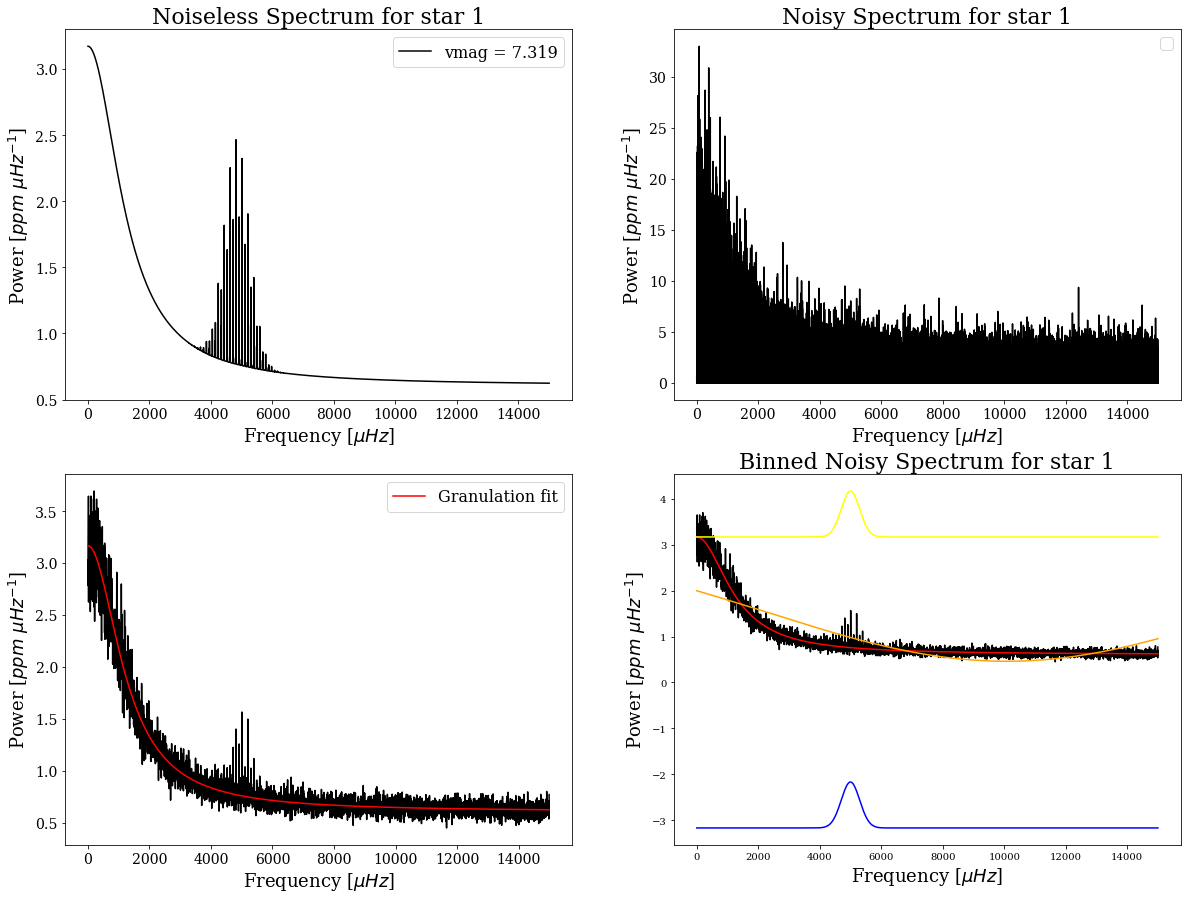

In [6]:
'''TESTING AND TROUBLESHOOTING'''

binsize=120
N = 40
vmag = vmags[0]
truevmax = vmaxs[0]
print(vmag)
SN = 18.0*10**(-0.4*(11-vmag))
x = []
y = []
x.append(catalogue[0])
y.append(catalogue[1]) # change index to pick star in data set

fig = plt.subplots(figsize=(20,15))
plt.subplot(2, 2, 1)
plt.plot(x[0], y[0], color='k', label = f'vmag = {vmag}') #leave these indicies
plt.title(f'Noiseless Spectrum for star {1}', fontsize = 22)
plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 16)

y_n = addnoise(y[0])
plt.subplot(2, 2, 2)
plt.plot(x[0], y_n, color='k') #label = ‘label’) #leave these indicies
plt.title(f'Noisy Spectrum for star {1}', fontsize = 22)
plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 16)
    
    
xny=bin_it(addnoise(catalogue[1]),frequency,binsize) #returns x = xny[1], and y = xny[0]
best_vals = findgran(xny[1],xny[0])
print(f'A is {best_vals[0]} and tau is {best_vals[1]}')
fittedgran = graneq(xny[0], best_vals[0], best_vals[1])
plt.subplot(2, 2, 3)
plt.plot(xny[1], xny[0], color='k')
plt.plot(xny[1], (graneq(xny[1], best_vals[0], best_vals[1])), color='r', label = 'Granulation fit')
plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 16)


best, best2 = find_vmax(y_n, x[0], N, binsize, truevmax)
print(best)
print(best2)

G = fittedgran
print(G)

GG = gausgran(xny[1], 1, 5000, 300)
print(GG)

GGG = gausgran1(xny[1], 1, 5000, 300)
print(GGG)

plt.subplot(2, 2, 4)
plt.plot(xny[1],xny[0], color='k')
plt.plot(xny[1], (graneq(xny[1], best_vals[0], best_vals[1])), color='r', label = 'Granulation fit')
plt.plot(xny[1], (gausgran(xny[1], 1, 5000, 300)), color='yellow', label = 'Estimated $\nu_{max}$')
plt.plot(xny[1], (gausgran1(xny[1], 1, 5000, 300)), color='blue', label = 'Estimated $\nu_{max}$')
plt.plot(xny[1], (gausgran(xny[1], best2[0], best2[1], best2[2])), color = 'orange')
plt.title(f'Binned Noisy Spectrum for star {1}', fontsize = 22)
plt.xlabel(r'Frequency [$\mu Hz$]', fontsize = 18)
plt.ylabel(r'Power [$ppm\ \mu Hz^{-1}$]', fontsize = 18)
savename = 'Freq_Power_Spec_K_dwarf' + str(i) + '.png'
plt.savefig('Code Plots (K dwarfs)/TroubleTEST_(27-02)_' + savename, overwrite = True)
plt.show()